In [8]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dfTrial = pd.read_csv('../data/trialPromoResults.csv', index_col='index')
dfCust = pd.read_csv('../data/custdatabase.csv', index_col='index')
dfActual = pd.read_csv('../data/Cust_Actual.csv', index_col='index')
dfTrain = pd.read_csv('../data/Train.csv', index_col='index')

In [100]:
dfTrial.describe()

,age,children,income,avbal,avtrans
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.777720,1.003000,5119.725060,21779.968610,1856.060490
std,14.313917,1.104632,3278.980026,11382.111805,1272.986294
min,18.050000,0.000000,369.520000,814.950000,45.760000
25%,29.395000,0.000000,2545.725000,13984.857500,994.850000
50%,39.945000,1.000000,4329.940000,19956.505000,1485.590000
75%,50.080000,2.000000,7167.150000,27100.500000,2400.497500
max,89.910000,4.000000,19715.690000,78385.030000,8138.310000


In [101]:
dfTrial.head()

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,decision
index,,,,,,,,,,
1,F,married,56.82,1,legal,secondary,3105.39,33003.48,1776.81,None
2,M,widowed,87.35,3,retired,tertiary,4874.08,18941.99,863.56,None
3,M,single,28.75,0,manuf,professional,14232.37,30013.32,3231.14,B
4,F,married,35.71,0,education,postgrad,3214.93,15423.24,1996.09,None
5,M,single,20.53,0,construct,tertiary,3214.93,15423.24,1996.09,None


In [102]:
dfTrain.head()

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,status,p_score
index,,,,,,,,,,,
1001,M,divorced,44.27,2,legal,postgrad,10245.73,53183.04,4069.67,None,5.2
1002,M,married,61.90,1,legal,secondary,1942.57,18100.78,1522.42,None,2.5
1003,M,divorced,37.30,1,IT,tertiary,9896.16,24496.82,2723.35,None,4.1
1004,F,divorced,25.02,1,legal,postgrad,10136.44,26690.01,4143.04,None,4.4
1005,F,divorced,48.37,2,government,secondary,2521.11,13439.81,240.26,None,2.3


In [103]:
dfTrain.describe()

,age,children,income,avbal,avtrans,p_score
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,40.701337,0.915500,5308.354605,22321.316500,1932.156740,3.358550
std,14.074204,1.052681,3307.480857,11872.049604,1318.799637,0.860609
min,18.020000,0.000000,356.970000,88.000000,8.940000,1.400000
25%,28.530000,0.000000,2647.057500,13489.815000,993.750000,2.700000
50%,39.685000,1.000000,4669.165000,20276.015000,1583.885000,3.200000
75%,48.035000,2.000000,7208.450000,29826.920000,2500.380000,3.900000
max,89.820000,4.000000,19955.570000,88682.430000,8789.100000,7.100000


In [104]:
dfTrain.columns

Index(['sex', 'mstatus', 'age', 'children', 'occupation', 'education',
       'income', 'avbal', 'avtrans', 'status', 'p_score'],
      dtype='object')

In [26]:
dfTrain = dfTrain.sort_values(by=['p_score'])

In [27]:
dfTrain.head()

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,status,p_score
index,,,,,,,,,,,
3085,F,widowed,84.12,1,retired,secondary,692.33,3542.30,667.19,None,1.4
3717,F,married,65.04,2,retired,secondary,1509.65,2366.30,284.93,None,1.5
4638,M,widowed,89.79,1,retired,secondary,889.28,2854.65,836.53,None,1.5
1381,F,widowed,68.59,1,retired,postgrad,2805.67,4519.43,218.95,None,1.6
2526,F,widowed,85.47,1,retired,secondary,591.67,9476.36,730.47,None,1.6


# Fuzzy 
## define fuzzy variables

In [31]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
age = ctrl.Antecedent(dfTrain['age'], 'age')
children = ctrl.Antecedent(dfTrain['children'], 'children')
income = ctrl.Antecedent(dfTrain['income'], 'income')
avbal = ctrl.Antecedent(dfTrain['avbal'], 'avbal')
avtrans = ctrl.Antecedent(dfTrain['avtrans'], 'avtrans')

pscore = ctrl.Consequent(dfTrain['p_score'], 'p_score')

# Auto-membership function population is possible with .automf(3, 5, or 7)
age.automf(3)
children.automf(3)
income.automf(3)
avbal.automf(3)
avtrans.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
pscore['low'] = fuzz.trimf(pscore.universe, [0, 0, 4])
pscore['medium'] = fuzz.trimf(pscore.universe, [0, 4, 8])
pscore['high'] = fuzz.trimf(pscore.universe, [4, 8, 8])

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


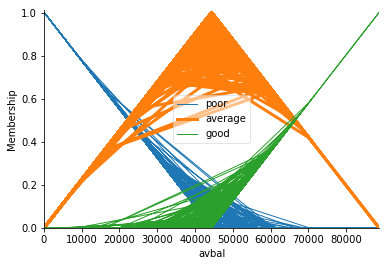

In [32]:
avbal['average'].view()

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


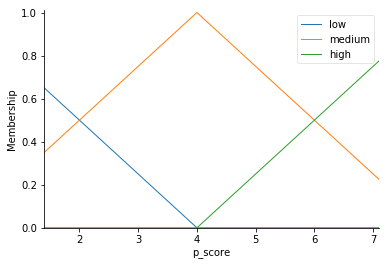

In [33]:
pscore.view()

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


AttributeError: 'tuple' object has no attribute 'show'

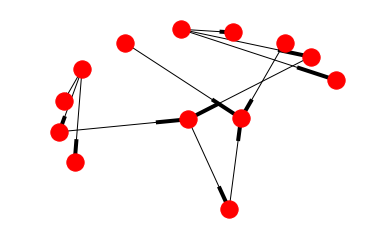

In [34]:
rule1 = ctrl.Rule(age['poor'] | income['poor'], pscore['low'])
rule2 = ctrl.Rule(avbal['average'], pscore['medium'])
rule3 = ctrl.Rule(children['poor'] | avtrans['good'], pscore['high'])

rule1.view()